<a href="https://colab.research.google.com/github/subodh7cr/Spam_detector/blob/main/spamdetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("spam.csv",encoding =('ISO-8859-1'),low_memory =False)

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4743,ham,"\Thinking of u ;) x\""""",NaN,NaN,NaN
347,ham,One small prestige problem now.,NaN,NaN,NaN
3008,spam,Update_Now - 12Mths Half Price Orange line ren...,NaN,NaN,NaN
5147,spam,Get your garden ready for summer with a FREE s...,NaN,NaN,NaN
3641,ham,My house here e sky quite dark liao... If rain...,NaN,NaN,NaN


In [ ]:
df.shape


(5572, 5)

In [ ]:
#data cleaning -removing Nan values and all
#Eda
#Text pre------stemming ,stopwords etc
#model building 
#evaluation
#improvement 
#website
#deploy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop columns that are not useful

#inplace True has to be capital 'T'
#inplace permannetly make changes to original data 

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
1487,ham,I told your number to gautham..
34,spam,Thanks for your subscription to Ringtone UK yo...
1822,ham,If you're thinking of lifting me one then no.
811,ham,So there's a ring that comes with the guys cos...
2600,ham,"As usual..iam fine, happy &amp; doing well..:)"


In [ ]:
#rename column using dictionary

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample()

,target,text
2687,ham,Okie


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#label encoder to convert o/p non numerical label into numerical label
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() 



In [ ]:
#convert target o/p to encoder
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#check duplicates
df.duplicated().sum()

403

In [ ]:
#drop duplicates
# applied automatically on non encoded column(as x i/p here )

df=df.drop_duplicates(keep='first')

In [ ]:
#duplicates dropped
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
#2....EDA
# % of spam and % of ham  

df['target'].value_counts()






0    4516
1     653
Name: target, dtype: int64

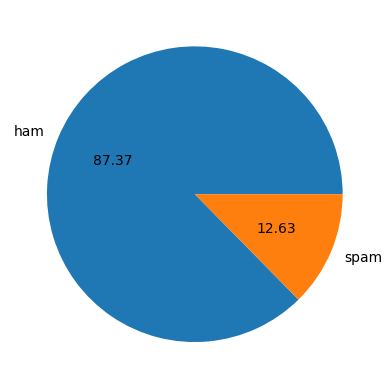

In [ ]:
# for more detailed representation we will draw piechart 

#autopct to label the wedges inside
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
# hence data is imbalanced here

In [ ]:
# now for futher analysis we create new columns for analysis 
#building Python programs that work with human language data for applying in statistical natural language processing (NLP)


import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#now to calculate the no of words here 

df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#Now fetch no of words
#lambda function arguments : single expression


df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))



In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#breaking into sentences using sent in tokenize 


df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#analysing on data 


df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#analysing on ham data (keep in mind we are passing list so double bracket)

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# now we have got an idea that spam messages are greater than ham messages 

# hence we can also plot the same in histogram also


import seaborn as sns



<Axes: xlabel='num_characters', ylabel='Count'>

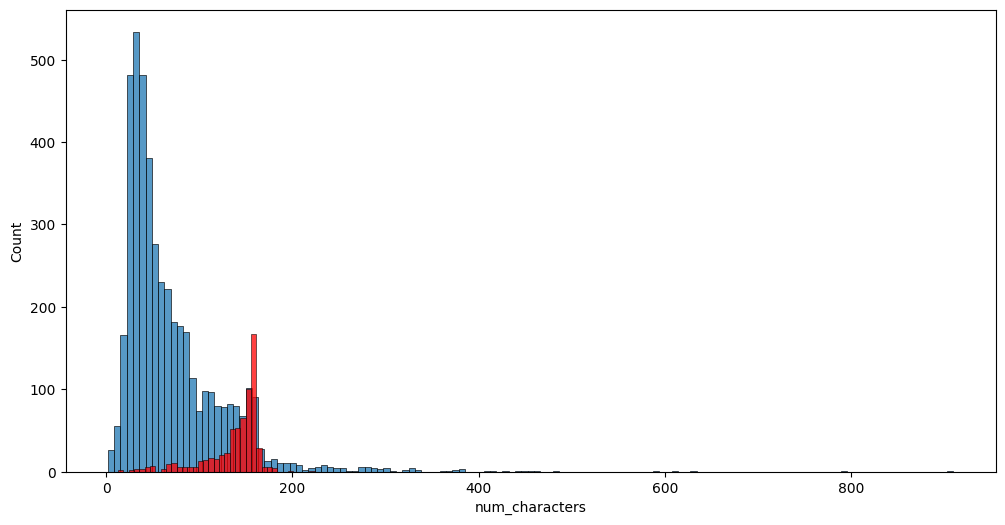

In [ ]:
#plot to have idea of num_character column for ham distribution

# so we are plotting an histogram for the same 

plt.figure(figsize=(12,6)) 
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

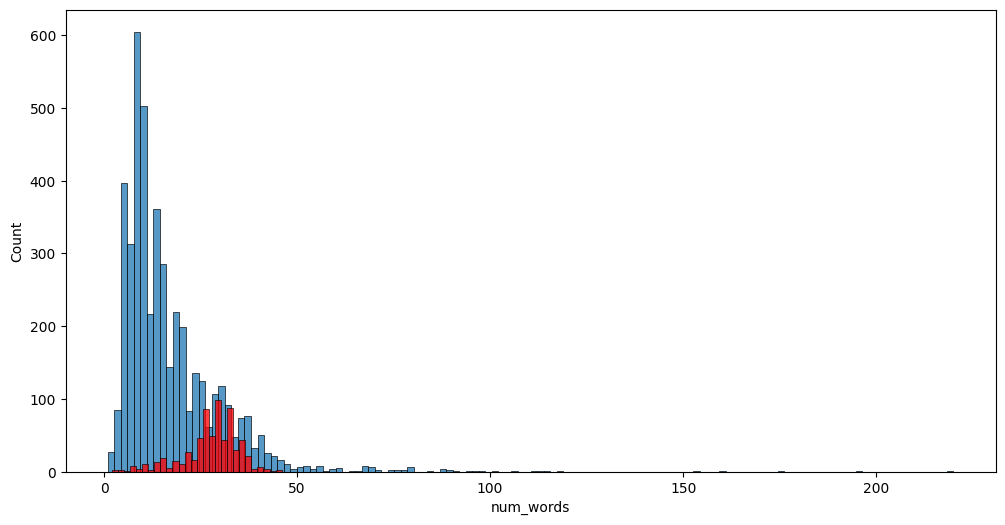

In [ ]:
# same we can see for no of words also 

plt.figure(figsize=(12,6)) 
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

# we get that for ham max word count have relatively less value as compared to spam
# we also have outliers here (some points with max length )

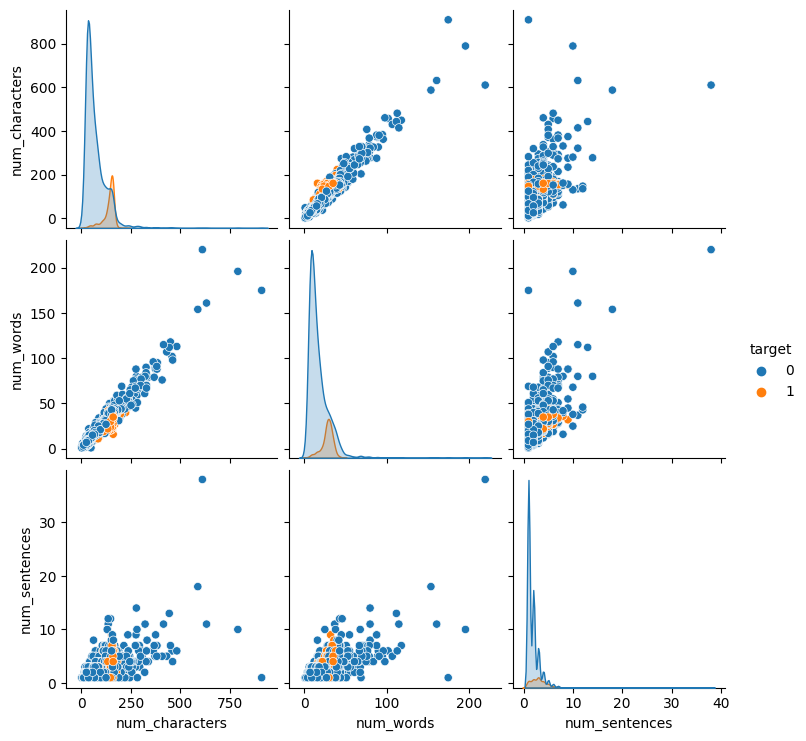

In [ ]:
#we passed df and the target hence 0 and 1 values plotted 

#hue is the category which we need to classify here target as 0 and 1 as subcategory

sns.pairplot(df,hue='target')

<Axes: >

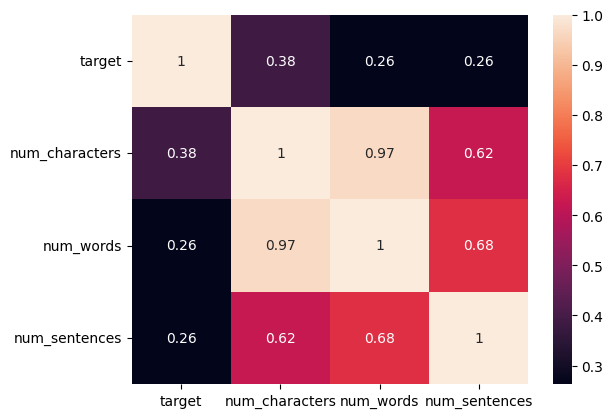

In [ ]:
#now we try to find relation between random variable using pearson correlation coef

#now here we have multicollinearity hence we will take any one feature with maxvalue (num_charac here)
sns.heatmap(df.corr(),annot=True)



In [ ]:
#Data Preprocessing here need to be done 

#Lower case
#Tokenization
#Remove speicial charac
#remove stop words --is ,of ,the.....
#stemming - dance , dancing........


#hence we create a new function which will perform all these functs at once



def transform_text(text):
 #lowercase done
  text=text.lower()
  #now tokenize words
  text=nltk.word_tokenize(text)
  #remove stop words 

  #remove special character

  
  y=[]
  for i in text:
    if i.isalnum():
          y.append(i)

#while doing cloning of text we don't directly do it like text=y
#stopword removal code
  text=y[:]
  y.clear()
  
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i) 
  
  #stemming  
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i)) 

  #return as string  
  #This function joins elements of a sequence and makes it a string with space here b/w two words       
  return " ".join(y)
    


In [ ]:

#to have stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
#transform_text('how are you 20%')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#now stemming -----treats words by their root form
#stemming example
ps=nltk.PorterStemmer()
ps.stem('Loving newing Car')

#df['text'][10]

'loving newing car'

In [ ]:
# now we will make a new column for tranformed text 

df['transformed_text']=df['text'].apply(transform_text)


In [ ]:
#new column created transfomed text after pre processing

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


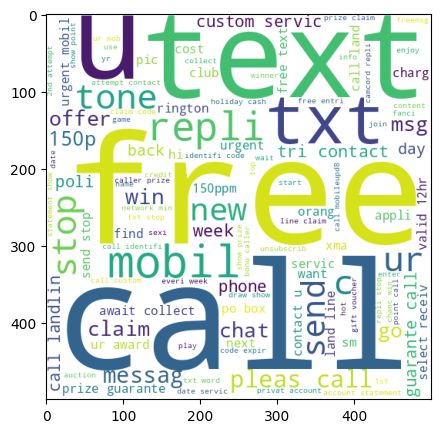

In [ ]:
# now we will create word cloud(most frequent used words) which will highlight all the imp words in eg 'ham'

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,5))
plt.imshow(spam_wc)

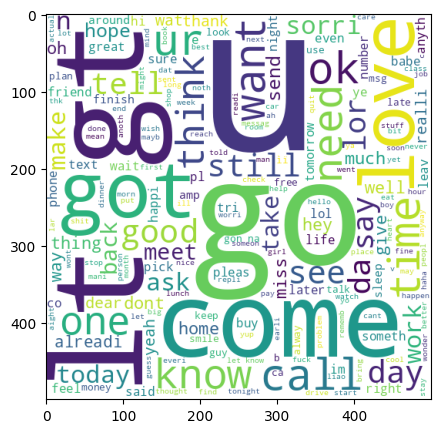

In [ ]:
#stopwords for ham 

ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,5))
plt.imshow(ham_wc)

In [ ]:
#to get top 30 words 
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
#now we create dictionary of the words and their occurence 
#will give top 30 most occuring words


from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
#analysis on top 30 words
#putting words into data frame 
pd.DataFrame(Counter(spam_corpus).most_common(30))



,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

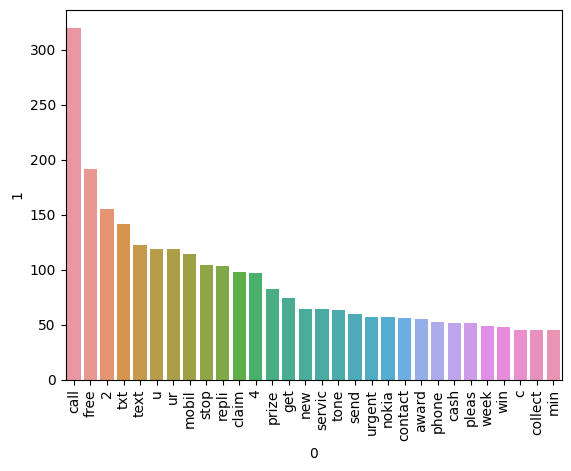

In [ ]:

#plotting the barplot for freq of top 30 words 
#here in barplot without x= and y= it is giving error of values between 0 and 1

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [ ]:
#for ham top 30 words


ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

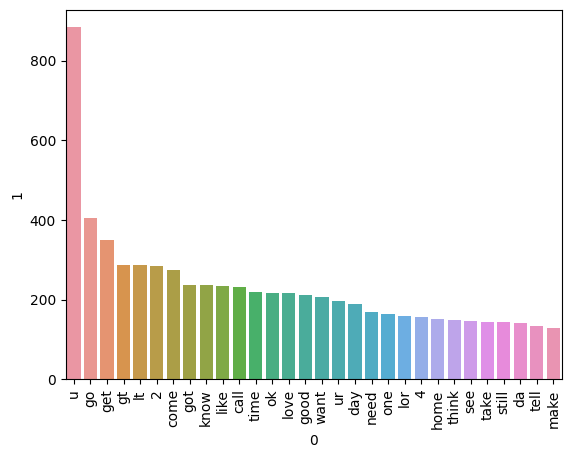

In [ ]:
#plotting graph for ham of top 30 words with max freq

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [ ]:
# start with naive bayes (start with text data)

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Model Building **

In [ ]:
#Now we have target in text but we need to convert transformed_text into vector form
#------methods--> BOW,Tfidf,W2V
#we are using BOW here
#countvectorizer builds BOW model 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#we can also restrict the no of unique features that we have here to reduce vector size
tfidf=TfidfVectorizer(max_features=3000)
#remove # for bow type below
#cv=CountVectorizer()





In [ ]:
# to convert transformed_text to matrix type(here BOW in matrix form of texts) which will be taken as input(X)
#X=cv.fit_transform(df['transformed_text']).toarray()
#remove # above for BOW
X=tfidf.fit_transform(df['transformed_text']).toarray()
X




array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#now extract y values 
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#now we apply train test split values 
from sklearn.model_selection import train_test_split


In [ ]:
#we have splitted the data accordingly
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
#now importing different naive bayes since we dont know the model

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
!pip install category_encoders
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.4 MB/s eta 0:00:00


In [ ]:
#making objects of all types 

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [ ]:
# On gaussian naive bayes we get the following reuslts

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer2.pkl','wb'))
pickle.dump(mnb,open('model2.pkl','wb'))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# here we will go with  'tfidf'  'mnb' since precision is max

In [ ]:
from sklearn.linear_model import LogisticRegression
#svc(support vector classifier) means linear hyperplane but not for svm 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
#liblinear -- coordinate descent algo in direction of min value
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
#creating function for classifer and passing classifier obj to it
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
#creating list for all classifier values
accuracy_scores = []
precision_scores = []

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703


KeyboardInterrupt: ignored

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

In [ ]:
#now melt to write in more computer friendly manner for easier analysis of table

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

In [ ]:
# we have found train and test on X and y which found here from tfidf on transformed_text

#catplot for freq 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Model improvement methods 

1.Restict the vector to 3000

2.scale x to certain value limit

In [ ]:
# now we add num_characters feature to X and sending it 

#so no much addition to the result
#now we will try to make a model out of all the best performing models we have


# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
performance_df

Hence we have 3 steps to follow

1.transform the text( stopwords , stemming and all)

2.Vectorize the text

3. apply ml model ago


In [ ]:
#pickle allows to save ML model which can be shared or used again 

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
# when we train mnb and then again assign the mnb = MultinomialNB() then the value reverts to its intital state 
#and when we train for voting classifier then in that case then indiviual models inside are not trained ( such on high level acc to voting classifier models are trained , since features are diff)
#so train the model accordingly again and again